<a href="https://colab.research.google.com/github/SSProma/6220-Sabrina-Shakhawat/blob/main/INSE_6220_Project_40266939.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRINCIPAL COMPONENT ANALYSIS FOR WORLD HAPPINESS CATEGORIZATION & PREDICTION USING MACHINE LEARNING

**INSTALLATION OF PACKAGES**

In [1]:
!pip install upgrade sci-kit-learn
!pip install pycaret
!pip install pca
!pip3 install shap
!pip install pycaret[analysis]

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.7 MB/s eta 0:00:00




**IMPORT NECESSARY LIBRARIES & STYLE**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


**DATA DESCRIPTION**

The file contains data from the 2019 World Happiness Report. Here are the columns included:

1.Overall rank: The happiness rank of the country.

2.Country or region: Name of the country or region.

3.Score: The happiness score, which seems to be a composite measure. GDP per capita: Economic output per person.

4.Social support: Availability and quality of social support for individuals.

5.Healthy life expectancy: Average expected lifespan in good health. Freedom to make life choices: The degree to which individuals are free to make life choices.

6.enerosity: The average extent of generosity demonstrated by individuals.

7.Perceptions of corruption: General public perceptions of corruption in the country.

**Upload Kaggle data from Google Drive**

In [3]:
#Upload files


from google.colab import drive
drive.mount('/content/drive')

# Load data from drive
df = pd.read_csv('/content/drive/My Drive/2019.csv')
df.head(100)

Mounted at /content/drive


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
95,96,Cameroon,5.044,0.549,0.910,0.331,0.381,0.187,0.037
96,97,Bulgaria,5.011,1.092,1.513,0.815,0.311,0.081,0.004
97,98,Ghana,4.996,0.611,0.868,0.486,0.381,0.245,0.040
98,99,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090


In [4]:
#Dataset Cleanup

columns_to_drop = ['Overall rank', 'Country or region']
df = df.drop(columns=columns_to_drop)
df = df.drop_duplicates()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of duplicated rows is:  0
Number of rows with NaNs is:  0


**Categorization & Standardization of dataset**

In [5]:
# Categorize the 'Score' into 'Low', 'Medium', 'High'

df['Happiness Category'] = pd.cut(df['Score'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'])
df.drop(columns=['Score'], inplace=True)
df.columns = ['GDP', 'Social Support', 'Life Exp','Freedom', 'Generosity', 'corruption', 'Happiness Category' ]
print(df)

#Data Matrix &Standardize the Data

X = df.drop(columns=['Happiness Category'])

print(X.head(157))
print(X.describe().transpose())
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
print(X)

#Observations and variables

observations = list(X.index)
print(observations)
variables = list(X.columns)
print(variables)


       GDP  Social Support  Life Exp  Freedom  Generosity  corruption  \
0    1.340           1.587     0.986    0.596       0.153       0.393   
1    1.383           1.573     0.996    0.592       0.252       0.410   
2    1.488           1.582     1.028    0.603       0.271       0.341   
3    1.380           1.624     1.026    0.591       0.354       0.118   
4    1.396           1.522     0.999    0.557       0.322       0.298   
..     ...             ...       ...      ...         ...         ...   
151  0.359           0.711     0.614    0.555       0.217       0.411   
152  0.476           0.885     0.499    0.417       0.276       0.147   
153  0.350           0.517     0.361    0.000       0.158       0.025   
154  0.026           0.000     0.105    0.225       0.235       0.035   
155  0.306           0.575     0.295    0.010       0.202       0.091   

    Happiness Category  
0                 High  
1                 High  
2                 High  
3                 High 

**Data Analysis Plots**

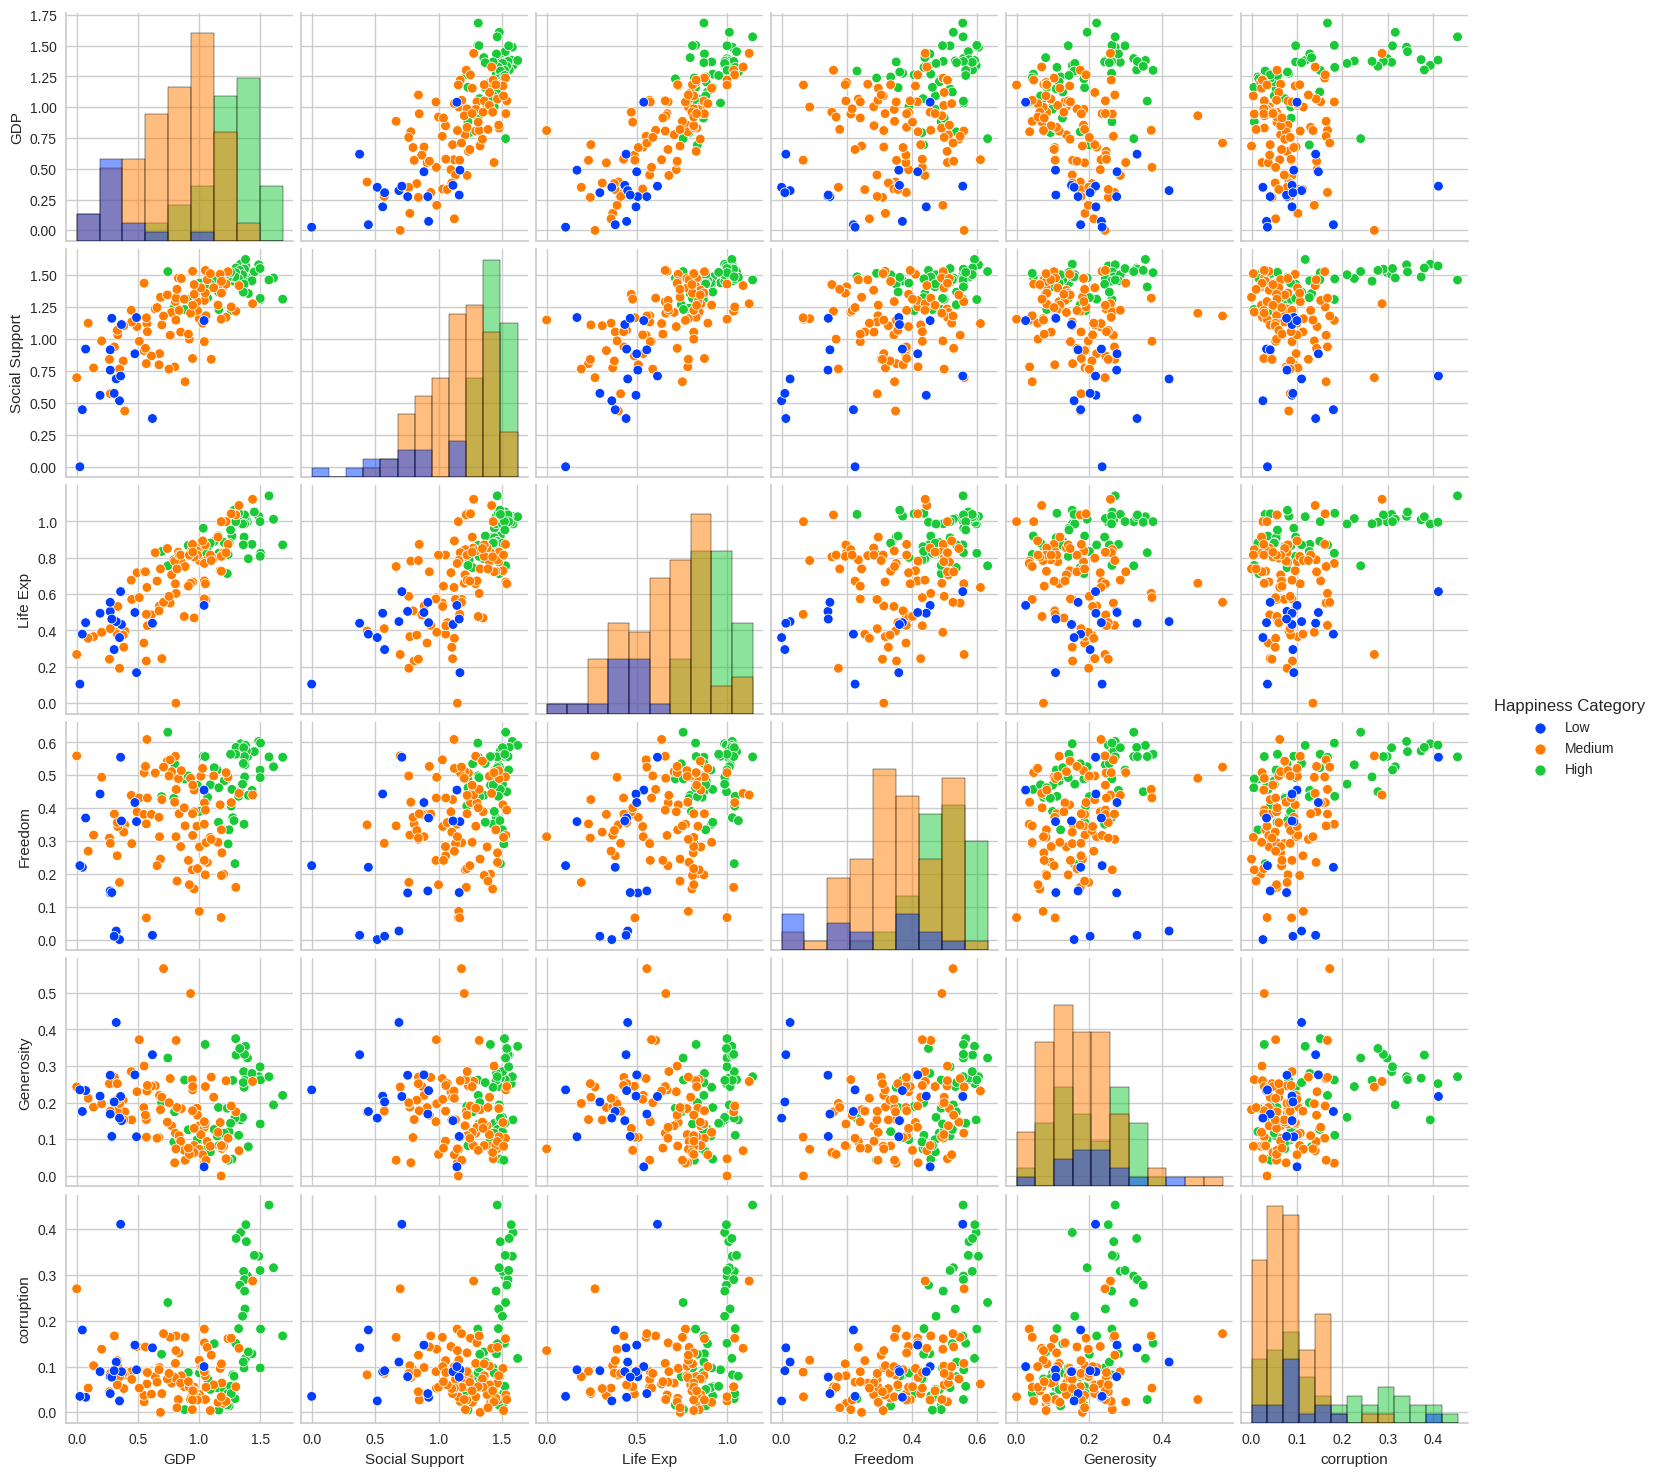

<Figure size 600x600 with 0 Axes>

In [30]:
#Exploratory Data Analysis

#creating Pair plot
sns.pairplot(df, hue='Happiness Category', diag_kind='hist',palette='bright')
plt.figure(figsize=(6, 6))
plt.tight_layout()
plt.show()

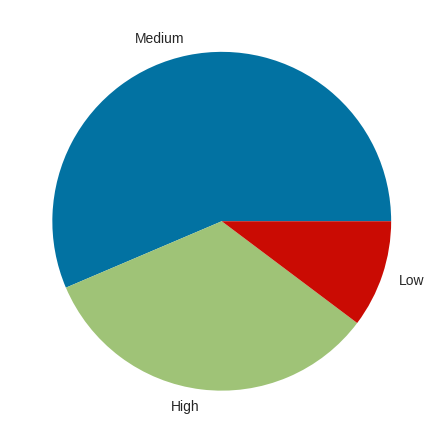

In [32]:
#pie plot
y =df['Happiness Category']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

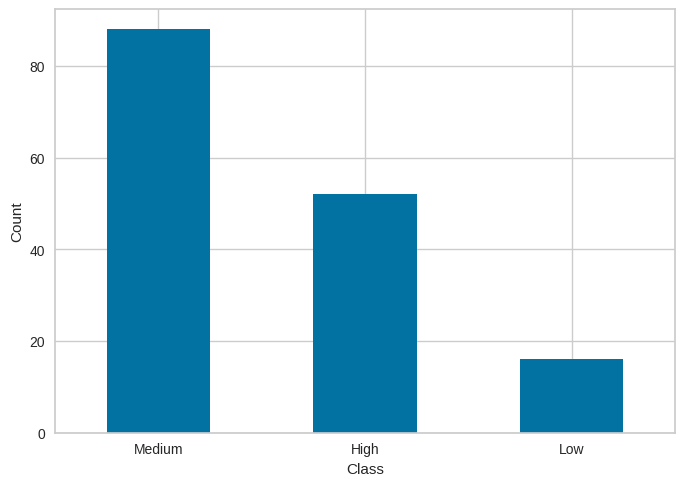

In [36]:
#Class Distribution

y = df['Happiness Category']
target = df['Happiness Category'].to_numpy()
y.value_counts().plot(kind='bar',rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

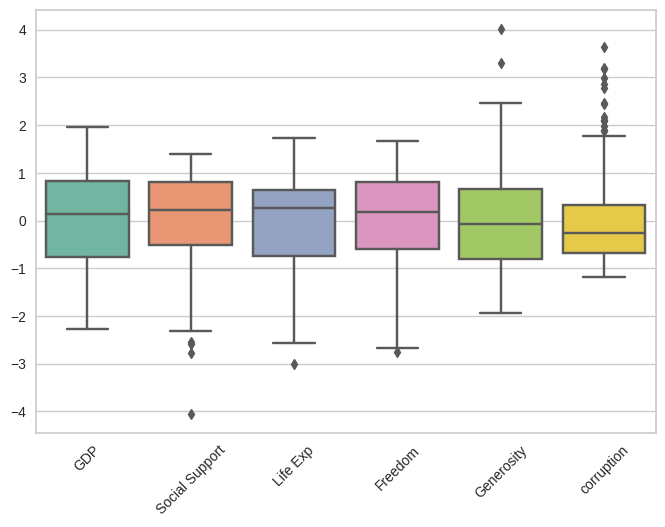

In [37]:
#box and whisker plot

ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

# Customize the outlier markers
outlier_marker = dict(marker='o', markersize=8, markerfacecolor='black', markeredgecolor='black')
plt.show()

<Figure size 800x550 with 0 Axes>

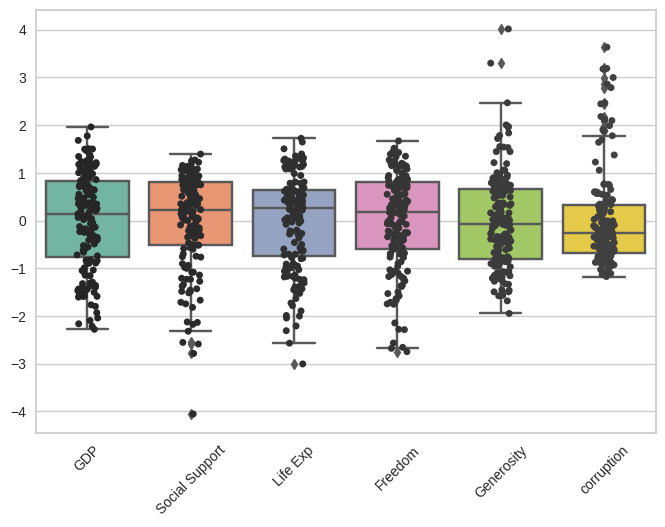

In [38]:

# Use swarmplot() or stripplot to show the datapoints on top of the boxes:

plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.show()

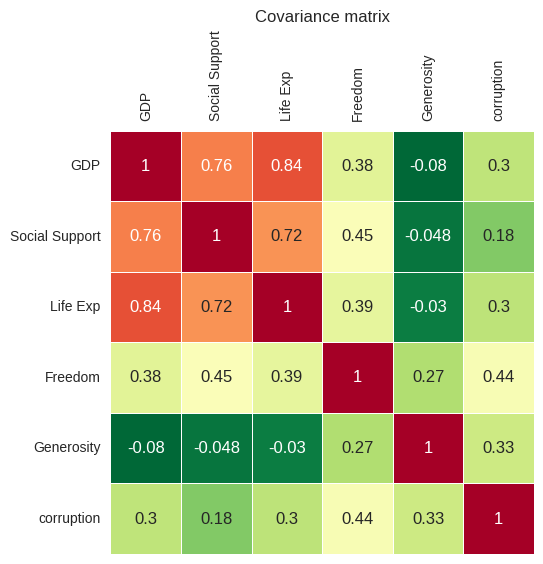

In [39]:
#Covariance

dfc = X - X.mean()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='center')

plt.title('Covariance matrix')
plt.show()

**Principal Component Analysis (PCA)**

In [7]:

#PCA Analysis USING pca LIBRARY

from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)
print(out['PC'])

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
          PC1       PC2       PC3       PC4       PC5
0   -3.134226  1.053542 -1.923436 -0.292394  0.584557
1   -3.292053  1.836057 -1.471747  0.238936  0.550629
2   -3.338247  1.537896 -0.788607  0.230770  0.267636
3   -2.592776  0.945854  1.538589  0.175867 -0.10534

**Scatter Plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


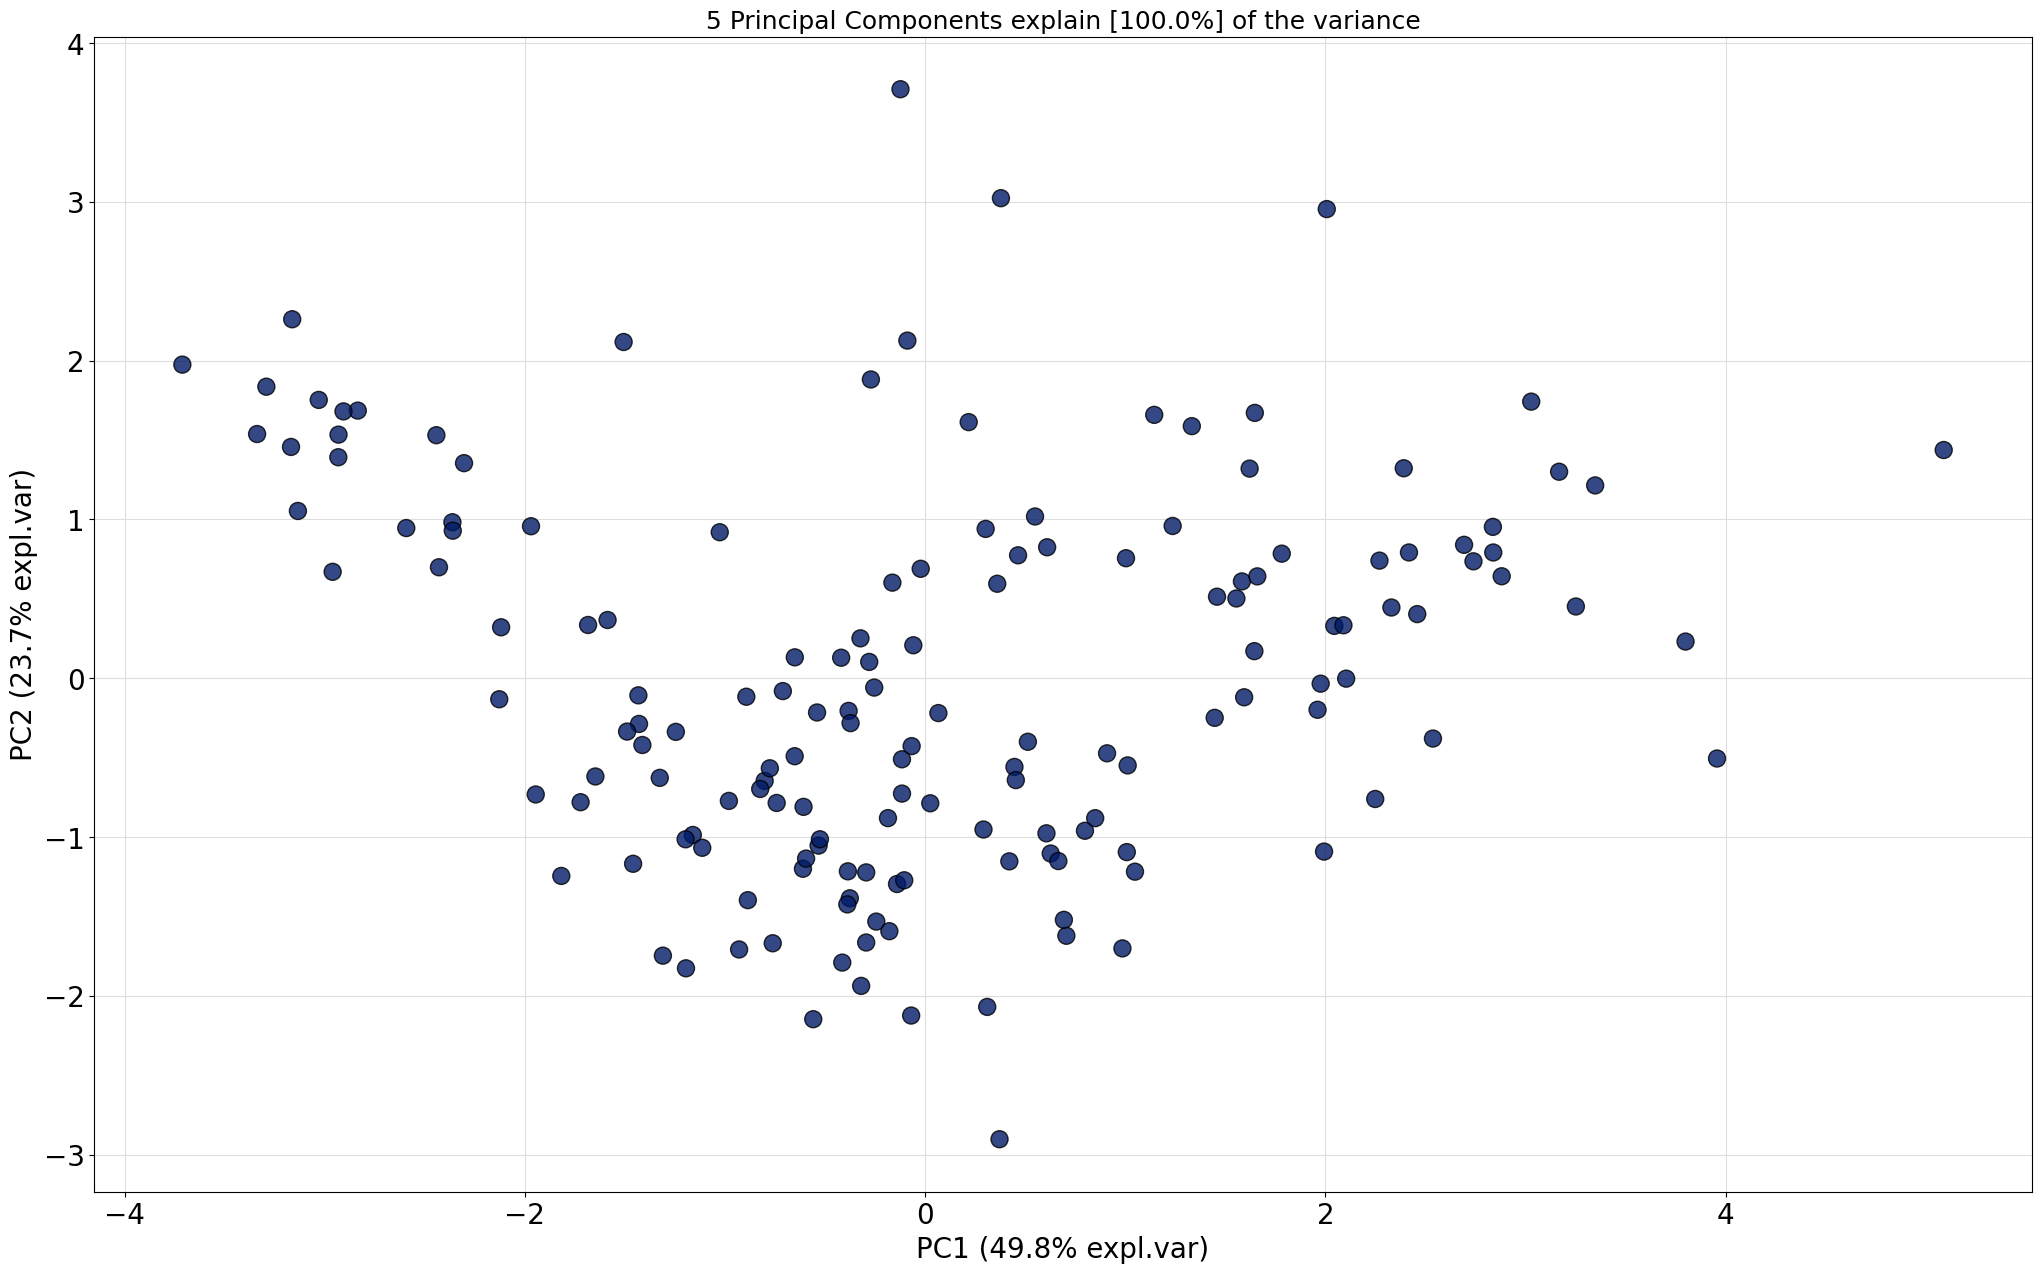

In [8]:
#scatter plot
model.scatter(label=True, legend=False)
plt.show()

**Eigenvectors**

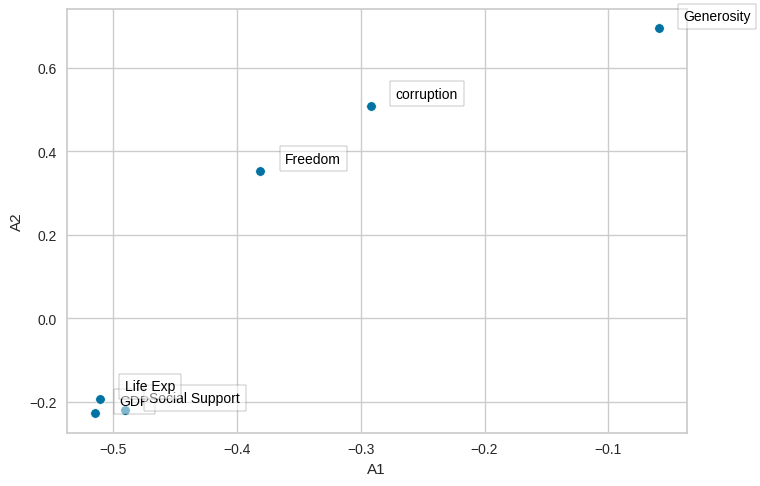

In [26]:
#eigen vector
A = out['loadings'].T

sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')

for i in range(A.shape[0]):
         plt.text(x=A.PC1[i] + 0.02, y=A.PC2[i] + 0.02, s=variables[i],
         fontdict=dict(color='black', size=10, rotation=0),
         bbox=dict(facecolor='white', alpha=0.5))

**Scree Plot**

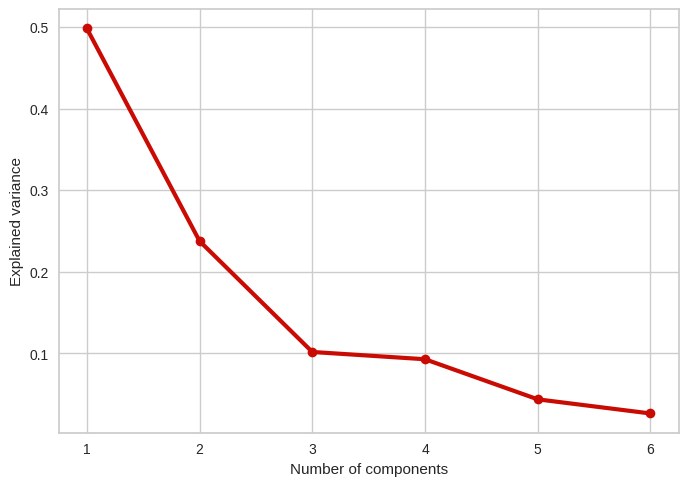

In [25]:
#Scree Plot

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

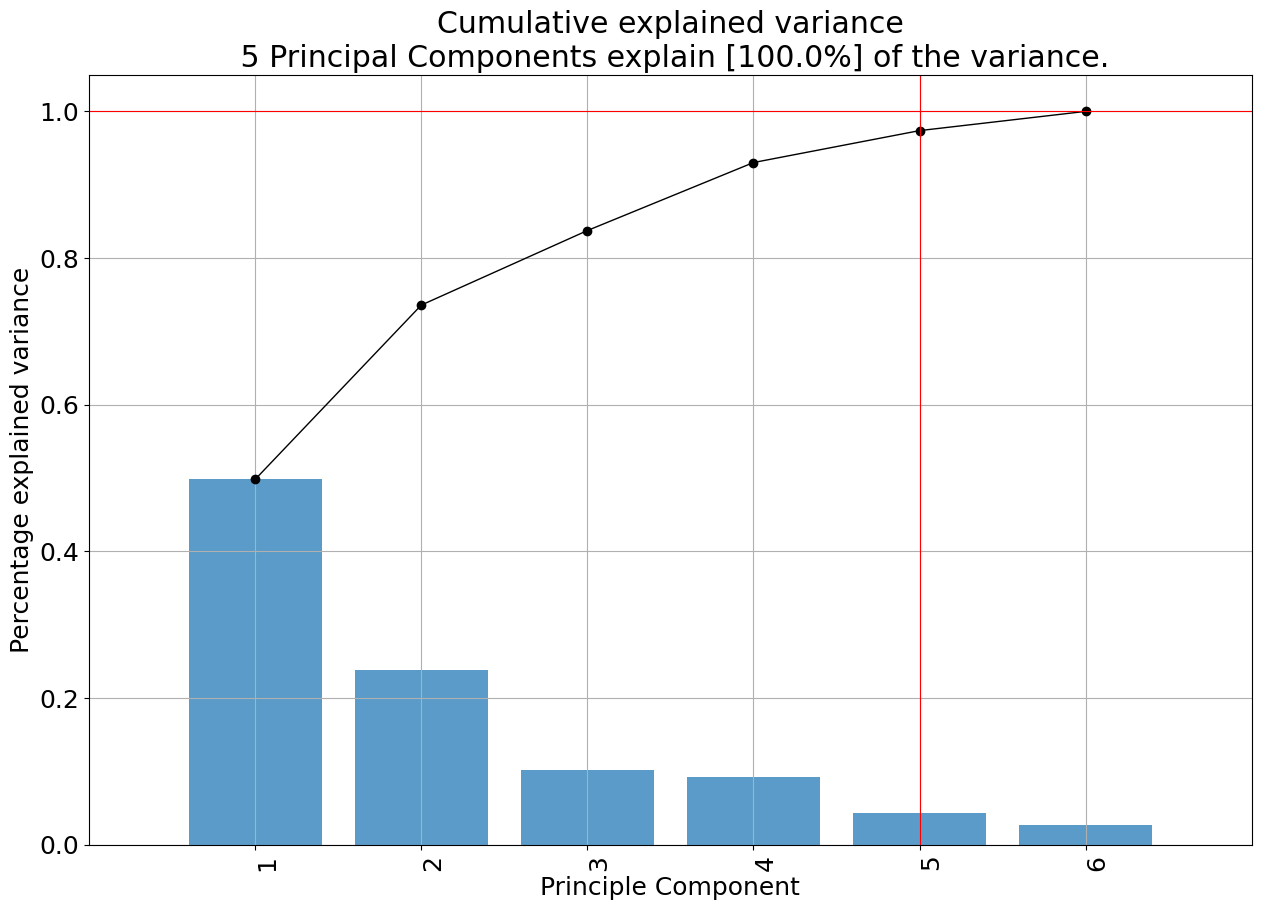

In [14]:
#explained variance

model.plot()
plt.show()


**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


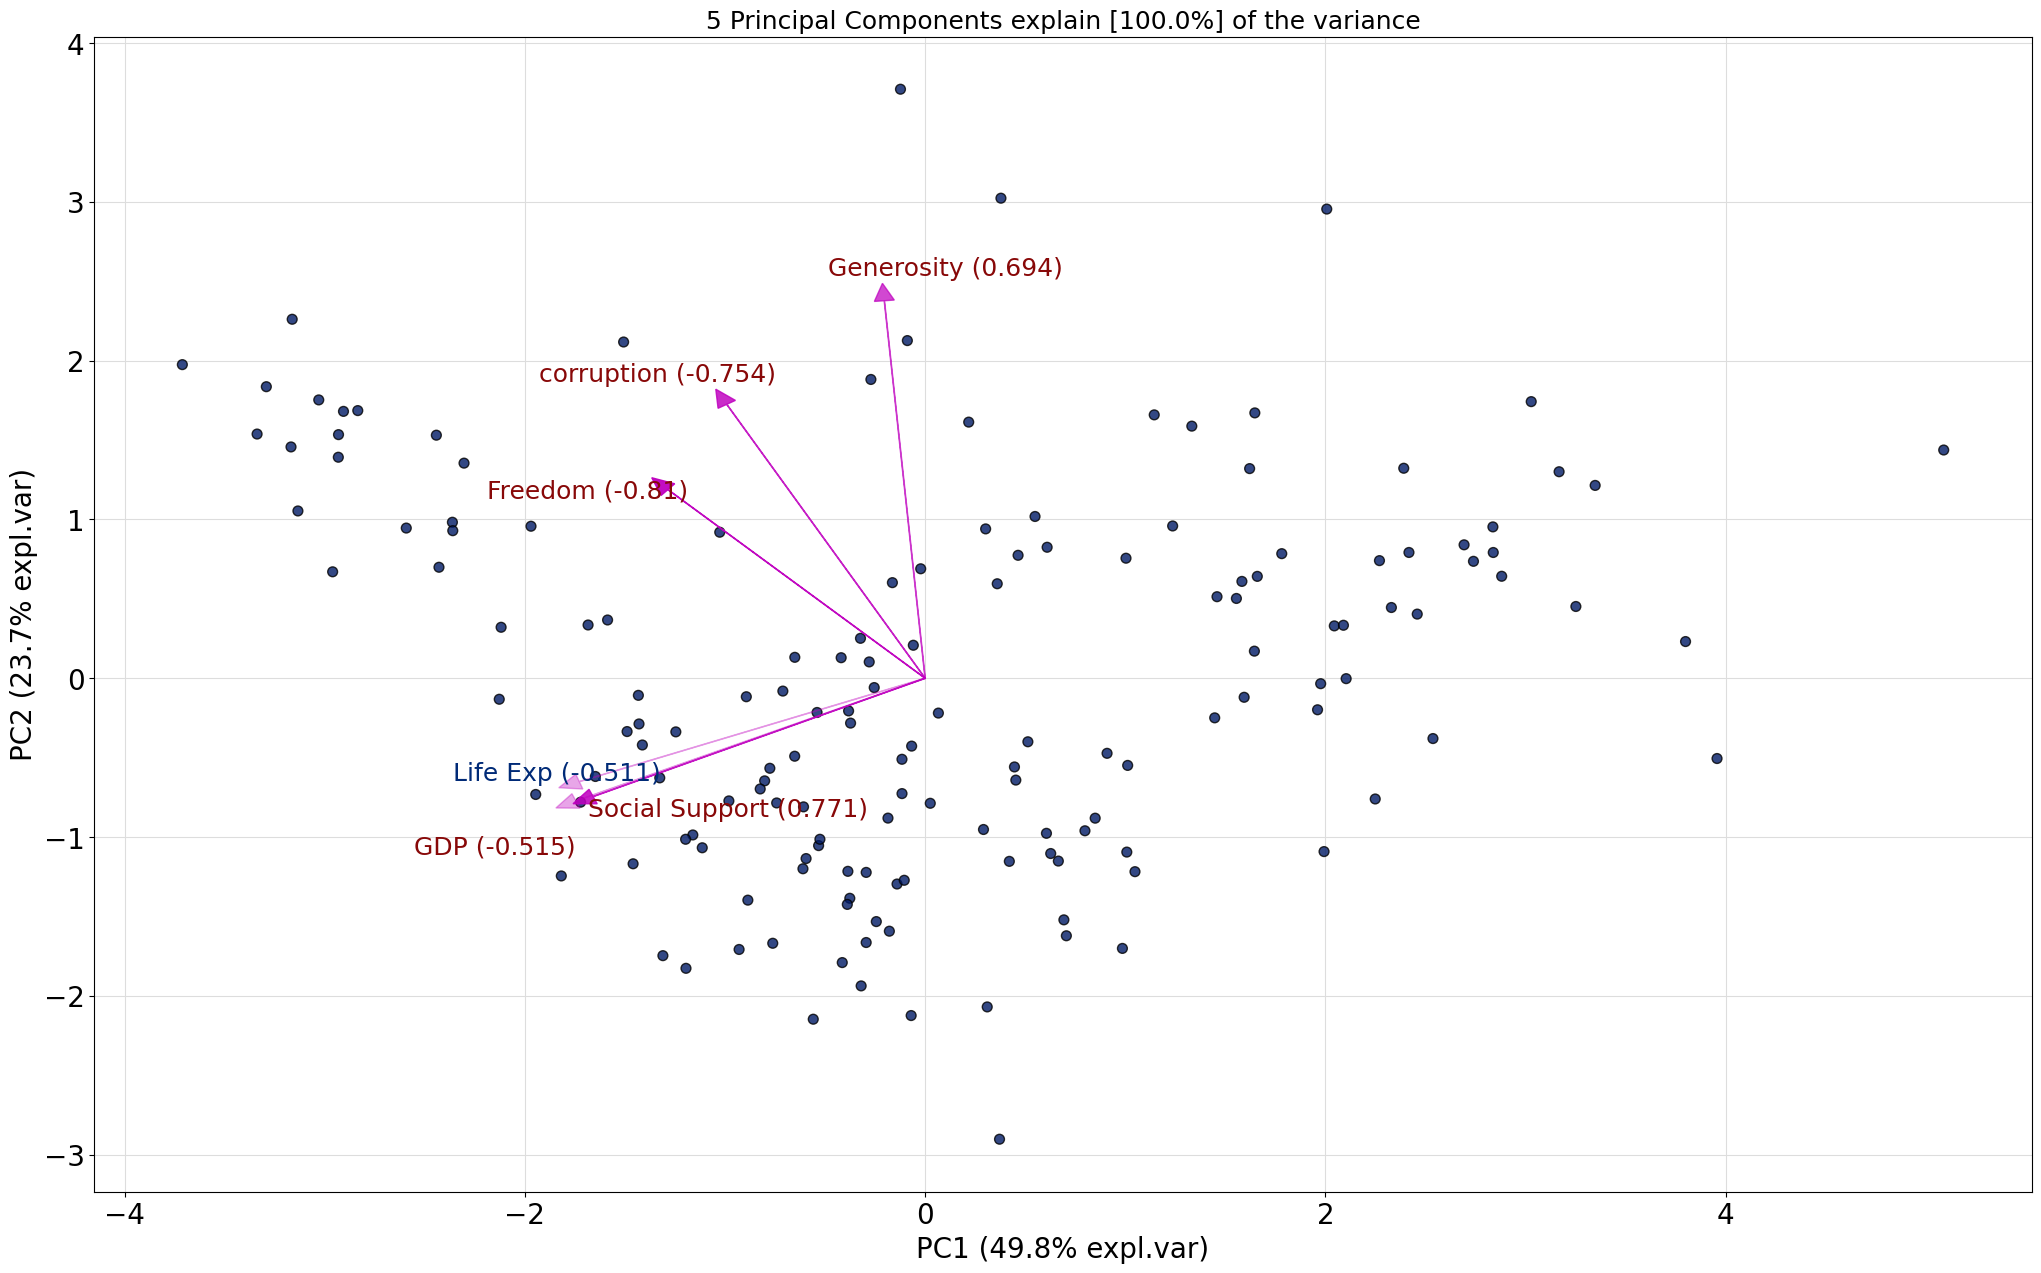

In [18]:
#biplot

model.biplot(label=False, legend=False, fontsize=18, color_arrow='m',s=50)
arrowprops=dict(arrowstyle = '->', size=4, color='blue')
plt.show()

# **Classification + PCA USING MACHINE LEARNING**

**Machine Learning Using PyCaret**

In [19]:
#Data Splitting


from pycaret.classification import *
clf_pca = setup(data=df, target='Happiness Category', train_size=0.7, session_id=123, normalize=True, pca=True, pca_components=5)
results = pull()
print(results)

,Description,Value
0,Session id,123
1,Target,Happiness Category
2,Target type,Multiclass
3,Target mapping,"High: 0, Low: 1, Medium: 2"
4,Original data shape,"(156, 7)"
5,Transformed data shape,"(156, 6)"
6,Transformed train set shape,"(109, 6)"
7,Transformed test set shape,"(47, 6)"
8,Numeric features,6
9,Preprocess,True


                    Description                       Value
0                    Session id                         123
1                        Target          Happiness Category
2                   Target type                  Multiclass
3                Target mapping  High: 0, Low: 1, Medium: 2
4           Original data shape                    (156, 7)
5        Transformed data shape                    (156, 6)
6   Transformed train set shape                    (109, 6)
7    Transformed test set shape                     (47, 6)
8              Numeric features                           6
9                    Preprocess                        True
10              Imputation type                      simple
11           Numeric imputation                        mean
12       Categorical imputation                        mode
13                    Normalize                        True
14             Normalize method                      zscore
15                          PCA         

**Find the Best Model**

In [20]:
#show the best model and their statistics
best_model_pca = compare_models()
print(best_model_pca)

# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)
print(tuned_best_model_pca)

#Evaluate Best Model
evaluate_model(tuned_best_model_pca)
results = pull()
print(results)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8073,0.8531,0.8073,0.7731,0.7831,0.6226,0.6357,0.0690
et,Extra Trees Classifier,0.8073,0.8493,0.8073,0.7765,0.7818,0.6136,0.6308,0.1800
lr,Logistic Regression,0.7982,0.0000,0.7982,0.7769,0.7776,0.6140,0.6304,1.1090
rf,Random Forest Classifier,0.7800,0.8275,0.7800,0.7396,0.7505,0.5746,0.5966,0.3790
nb,Naive Bayes,0.7709,0.8544,0.7709,0.7630,0.7494,0.5479,0.5743,0.0510
qda,Quadratic Discriminant Analysis,0.7618,0.0000,0.7618,0.7422,0.7398,0.5289,0.5472,0.0720
lda,Linear Discriminant Analysis,0.7618,0.0000,0.7618,0.7558,0.7457,0.5530,0.5715,0.0470
xgboost,Extreme Gradient Boosting,0.7527,0.8572,0.7527,0.7506,0.7343,0.5381,0.5600,0.0950
gbc,Gradient Boosting Classifier,0.7427,0.0000,0.7427,0.7635,0.7328,0.5380,0.5664,0.3310
ridge,Ridge Classifier,0.7336,0.0000,0.7336,0.6627,0.6871,0.4602,0.4757,0.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.6159,0.7273,0.6591,0.6909,0.4107,0.4216
1,0.7273,0.7682,0.7273,0.6591,0.6909,0.4107,0.4216
2,0.9091,0.9273,0.9091,0.8312,0.8671,0.8254,0.8427
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6364,0.7481,0.6364,0.5833,0.5974,0.2787,0.2976
5,0.7273,0.8727,0.7273,0.7273,0.6788,0.4407,0.5255
6,0.9091,0.9727,0.9091,0.8312,0.8671,0.8254,0.8427
7,0.8182,0.9818,0.8182,0.8788,0.8182,0.6944,0.7353
8,0.8182,0.9273,0.8182,0.8409,0.8095,0.6901,0.7003


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7273  0.6159  0.7273  0.6591  0.6909  0.4107  0.4216
1       0.7273  0.7682  0.7273  0.6591  0.6909  0.4107  0.4216
2       0.9091  0.9273  0.9091  0.8312  0.8671  0.8254  0.8427
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.6364  0.7481  0.6364  0.5833  0.5974  0.2787  0.2976
5       0.7273  0.8727  0.7273  0.7273  0.6788  0.4407  0.5255
6       0.9091  0.9727  0.9091  0.8312  0.8671  0.8254  0.8427
7       0.8182  0.9818  0.8182  0.8788  0.8182  0.6944  0.7353
8       0.8182  0.9273  0.8182  0.8409  0.8095  0.6901  0.7003
9       0.8000  0.7677  0.8000  0.7250  0.7571  0.6154  0.6285
Mean    0.8073  0.8582  0.8073  0.7736  0.7777  0.6192  0.6416
Std     0.1032  0.1206  0.1032  0.1185  0.1122  0.2181  0.2122


**Random Forest Classifier Model**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.6250,0.6364,0.5909,0.6104,0.2667,0.2715
1,0.7273,0.6818,0.7273,0.6591,0.6909,0.4107,0.4216
2,0.9091,0.8273,0.9091,0.8312,0.8671,0.8254,0.8427
3,0.9091,1.0000,0.9091,0.9545,0.9201,0.8493,0.8624
4,0.7273,0.8104,0.7273,0.6623,0.6923,0.4762,0.4862
5,0.7273,0.7182,0.7273,0.7273,0.6788,0.4407,0.5255
6,0.8182,0.9545,0.8182,0.8182,0.8182,0.6765,0.6765
7,0.7273,0.9377,0.7273,0.7455,0.7300,0.5286,0.5363
8,0.8182,0.8990,0.8182,0.6818,0.7403,0.6562,0.7144


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6364  0.6250  0.6364  0.5909  0.6104  0.2667  0.2715
1       0.7273  0.6818  0.7273  0.6591  0.6909  0.4107  0.4216
2       0.9091  0.8273  0.9091  0.8312  0.8671  0.8254  0.8427
3       0.9091  1.0000  0.9091  0.9545  0.9201  0.8493  0.8624
4       0.7273  0.8104  0.7273  0.6623  0.6923  0.4762  0.4862
5       0.7273  0.7182  0.7273  0.7273  0.6788  0.4407  0.5255
6       0.8182  0.9545  0.8182  0.8182  0.8182  0.6765  0.6765
7       0.7273  0.9377  0.7273  0.7455  0.7300  0.5286  0.5363
8       0.8182  0.8990  0.8182  0.6818  0.7403  0.6562  0.7144
9       0.8000  0.8210  0.8000  0.7250  0.7571  0.6154  0.6285
Mean    0.7800  0.8275  0.7800  0.7396  0.7505  0.5746  0.5966
Std     0.0827  0.1173  0.0827  0.0995  0.0890  0.1756  0.1760


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.6432,0.6364,0.5909,0.6104,0.2667,0.2715
1,0.7273,0.7011,0.7273,0.6591,0.6909,0.4107,0.4216
2,0.9091,0.9182,0.9091,0.8312,0.8671,0.8254,0.8427
3,0.8182,0.8513,0.8182,0.7455,0.7778,0.6615,0.6732
4,0.6364,0.6422,0.6364,0.5833,0.5974,0.2787,0.2976
5,0.7273,0.7091,0.7273,0.7273,0.6788,0.4407,0.5255
6,0.9091,0.9182,0.9091,0.8312,0.8671,0.8254,0.8427
7,0.7273,0.7468,0.7273,0.6623,0.6923,0.4762,0.4862
8,0.6364,0.7255,0.6364,0.5273,0.5682,0.3714,0.3956


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6364  0.6432  0.6364  0.5909  0.6104  0.2667  0.2715
1       0.7273  0.7011  0.7273  0.6591  0.6909  0.4107  0.4216
2       0.9091  0.9182  0.9091  0.8312  0.8671  0.8254  0.8427
3       0.8182  0.8513  0.8182  0.7455  0.7778  0.6615  0.6732
4       0.6364  0.6422  0.6364  0.5833  0.5974  0.2787  0.2976
5       0.7273  0.7091  0.7273  0.7273  0.6788  0.4407  0.5255
6       0.9091  0.9182  0.9091  0.8312  0.8671  0.8254  0.8427
7       0.7273  0.7468  0.7273  0.6623  0.6923  0.4762  0.4862
8       0.6364  0.7255  0.6364  0.5273  0.5682  0.3714  0.3956
9       0.8000  0.8258  0.8000  0.7250  0.7571  0.6154  0.6285
Mean    0.7527  0.7681  0.7527  0.6883  0.7107  0.5172  0.5385
Std     0.0990  0.0985  0.0990  

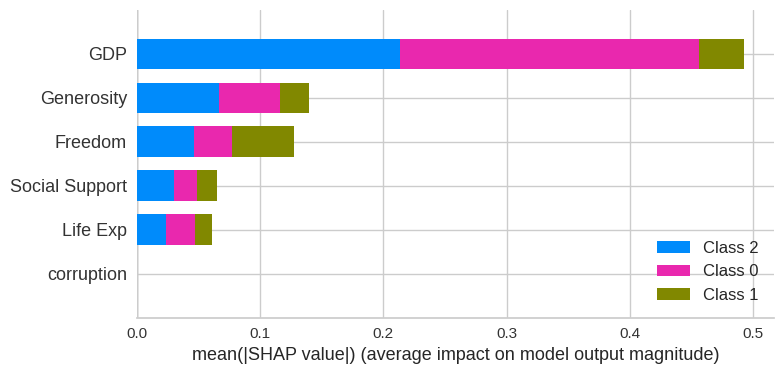

In [21]:
#Random Forest Classifier Model
rf_pca = create_model('rf')
results = pull()
print(results)

#tuning Random Forest Classifier Model
tuned_rf_pca = tune_model(rf_pca)
results = pull()
print(results)

#Evaluating tuned random forest classifier model

explainer = shap.TreeExplainer(tuned_rf_pca)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar')
plt.show()

**Extra Trees Classifier**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.6591,0.6364,0.5909,0.6104,0.2667,0.2715
1,0.6364,0.6477,0.6364,0.5606,0.5864,0.1538,0.1693
2,0.9091,0.8500,0.9091,0.8312,0.8671,0.8254,0.8427
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.7273,0.8610,0.7273,0.6623,0.6923,0.4762,0.4862
5,0.7273,0.8032,0.7273,0.7273,0.6788,0.4407,0.5255
6,0.8182,0.9727,0.8182,0.8182,0.8182,0.6765,0.6765
7,0.9091,0.9688,0.9091,0.9273,0.9100,0.8429,0.8552
8,0.9091,0.9071,0.9091,0.9221,0.8974,0.8382,0.8531


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6364  0.6591  0.6364  0.5909  0.6104  0.2667  0.2715
1       0.6364  0.6477  0.6364  0.5606  0.5864  0.1538  0.1693
2       0.9091  0.8500  0.9091  0.8312  0.8671  0.8254  0.8427
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.7273  0.8610  0.7273  0.6623  0.6923  0.4762  0.4862
5       0.7273  0.8032  0.7273  0.7273  0.6788  0.4407  0.5255
6       0.8182  0.9727  0.8182  0.8182  0.8182  0.6765  0.6765
7       0.9091  0.9688  0.9091  0.9273  0.9100  0.8429  0.8552
8       0.9091  0.9071  0.9091  0.9221  0.8974  0.8382  0.8531
9       0.8000  0.8228  0.8000  0.7250  0.7571  0.6154  0.6285
Mean    0.8073  0.8493  0.8073  0.7765  0.7818  0.6136  0.6308
Std     0.1182  0.1163  0.1182  0.1406  0.1315  0.2611  0.2563


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.6864,0.6364,0.5909,0.6104,0.2667,0.2715
1,0.7273,0.7932,0.7273,0.6591,0.6909,0.4107,0.4216
2,0.9091,0.8909,0.9091,0.8312,0.8671,0.8254,0.8427
3,0.8182,0.9818,0.8182,0.7727,0.7792,0.6393,0.6826
4,0.7273,0.9195,0.7273,0.6623,0.6923,0.4762,0.4862
5,0.7273,0.9636,0.7273,0.7273,0.6788,0.4407,0.5255
6,0.9091,1.0000,0.9091,0.8312,0.8671,0.8254,0.8427
7,0.9091,0.9688,0.9091,0.9221,0.9061,0.8333,0.8471
8,0.8182,0.8889,0.8182,0.6818,0.7403,0.6562,0.7144


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6364  0.6864  0.6364  0.5909  0.6104  0.2667  0.2715
1       0.7273  0.7932  0.7273  0.6591  0.6909  0.4107  0.4216
2       0.9091  0.8909  0.9091  0.8312  0.8671  0.8254  0.8427
3       0.8182  0.9818  0.8182  0.7727  0.7792  0.6393  0.6826
4       0.7273  0.9195  0.7273  0.6623  0.6923  0.4762  0.4862
5       0.7273  0.9636  0.7273  0.7273  0.6788  0.4407  0.5255
6       0.9091  1.0000  0.9091  0.8312  0.8671  0.8254  0.8427
7       0.9091  0.9688  0.9091  0.9221  0.9061  0.8333  0.8471
8       0.8182  0.8889  0.8182  0.6818  0.7403  0.6562  0.7144
9       0.8000  0.8964  0.8000  0.7250  0.7571  0.6154  0.6285
Mean    0.7982  0.8990  0.7982  0.7404  0.7589  0.5989  0.6263
Std     0.0889  0.0912  0.0889  

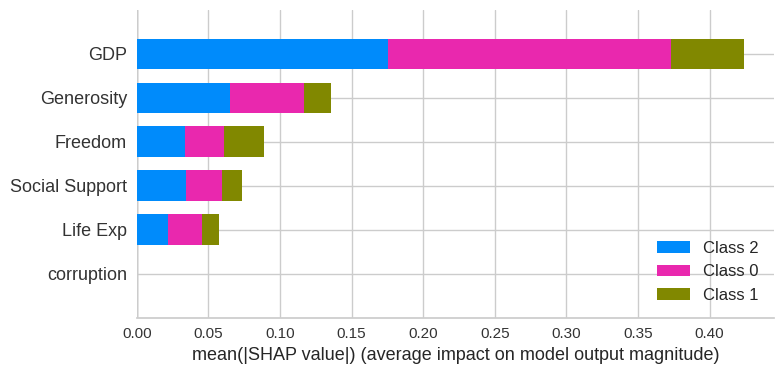

In [22]:
#Extra Trees Classifier Model

et_pca = create_model('et')
results = pull()
print(results)

#Tuning Extra Trees Classifier Model

tuned_et_pca = tune_model(et_pca)
results = pull()
print(results)

#Evaluating tuned extra trees classifier model

explainer = shap.TreeExplainer(tuned_et_pca)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)
plt.show()

**K Neighbors Classifier**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.6784,0.7273,0.6591,0.6909,0.4107,0.4216
1,0.7273,0.6591,0.7273,0.6591,0.6909,0.4107,0.4216
2,0.8182,0.8571,0.8182,0.7455,0.7778,0.6615,0.6732
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6364,0.7909,0.6364,0.5833,0.5974,0.2787,0.2976
5,0.8182,0.8299,0.8182,0.7727,0.7792,0.6393,0.6826
6,0.8182,0.9727,0.8182,0.8182,0.8182,0.6765,0.6765
7,0.9091,1.0000,0.9091,0.9273,0.9100,0.8429,0.8552
8,0.8182,0.9307,0.8182,0.8409,0.8095,0.6901,0.7003


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7273  0.6784  0.7273  0.6591  0.6909  0.4107  0.4216
1       0.7273  0.6591  0.7273  0.6591  0.6909  0.4107  0.4216
2       0.8182  0.8571  0.8182  0.7455  0.7778  0.6615  0.6732
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.6364  0.7909  0.6364  0.5833  0.5974  0.2787  0.2976
5       0.8182  0.8299  0.8182  0.7727  0.7792  0.6393  0.6826
6       0.8182  0.9727  0.8182  0.8182  0.8182  0.6765  0.6765
7       0.9091  1.0000  0.9091  0.9273  0.9100  0.8429  0.8552
8       0.8182  0.9307  0.8182  0.8409  0.8095  0.6901  0.7003
9       0.8000  0.8123  0.8000  0.7250  0.7571  0.6154  0.6285
Mean    0.8073  0.8531  0.8073  0.7731  0.7831  0.6226  0.6357
Std     0.0949  0.1174  0.0949  0.1212  0.1083  0.2021  0.1991


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.7375,0.6364,0.5909,0.6104,0.2667,0.2715
1,0.7273,0.8659,0.7273,0.6591,0.6909,0.4107,0.4216
2,0.8182,0.9091,0.8182,0.7727,0.7792,0.6393,0.6826
3,0.8182,0.9390,0.8182,0.7727,0.7792,0.6393,0.6826
4,0.7273,0.8961,0.7273,0.7273,0.6788,0.4407,0.5255
5,0.7273,0.8390,0.7273,0.7273,0.6788,0.4407,0.5255
6,0.9091,0.9545,0.9091,0.8312,0.8671,0.8254,0.8427
7,0.8182,0.8825,0.8182,0.7727,0.7792,0.6393,0.6826
8,0.7273,0.8525,0.7273,0.5942,0.6533,0.5075,0.5354


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6364  0.7375  0.6364  0.5909  0.6104  0.2667  0.2715
1       0.7273  0.8659  0.7273  0.6591  0.6909  0.4107  0.4216
2       0.8182  0.9091  0.8182  0.7727  0.7792  0.6393  0.6826
3       0.8182  0.9390  0.8182  0.7727  0.7792  0.6393  0.6826
4       0.7273  0.8961  0.7273  0.7273  0.6788  0.4407  0.5255
5       0.7273  0.8390  0.7273  0.7273  0.6788  0.4407  0.5255
6       0.9091  0.9545  0.9091  0.8312  0.8671  0.8254  0.8427
7       0.8182  0.8825  0.8182  0.7727  0.7792  0.6393  0.6826
8       0.7273  0.8525  0.7273  0.5942  0.6533  0.5075  0.5354
9       0.8000  0.8107  0.8000  0.7250  0.7571  0.6154  0.6285
Mean    0.7709  0.8687  0.7709  0.7173  0.7274  0.5425  0.5799
Std     0.0724  0.0605  0.0724  

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

  0%|          | 0/40 [00:00<?, ?it/s]

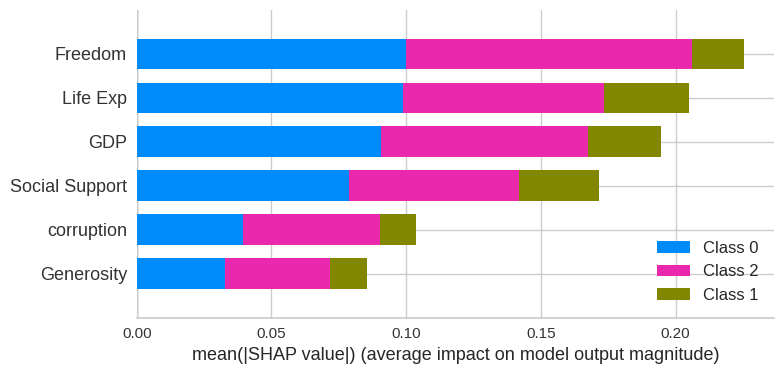

In [23]:
#K neighbors model

k_pca= create_model('knn')
results = pull()
print(results)


#Tuning K neighbors model

tuned_k_pca = tune_model(k_pca,custom_grid = {'n_neighbors' : np.arange(0,50,1)})

results = pull()
print(results)

#Evaluating K neighbors model

evaluate_model(tuned_k_pca )

X_train=X.sample(100)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

tuned_k_pca = KNeighborsClassifier(n_neighbors=5)
tuned_k_pca.fit(X_train, y_train)

explainer = shap.KernelExplainer(tuned_k_pca.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.sample(40))
shap.summary_plot(shap_values, X_test.sample(40), plot_type='bar')
plt.show()